<H1>Ejemplo de Análisis Estadístico</H1>

**G. Raush, MF-UPC**

_Mayo 2019_

Se describen los pasos seguidos en la práctica de analisis estadístico del los registros de velocidades y dirección de un sítio determinado. Las medidas corresponden a la velocidad y dirección para dos alturas en concreto, 10 y 30 m. 

Para la el análisis de los registros se recurre al uso de herramientas Python usadas en análisis de grandes cantidades de datos como es el caso de Pandas Toolbox.

Inicialización de entorno y herramientas de análisis y graficación.

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Importación de datos. Este proceso es transparente para el caso de __pandas__ así como la identificación del tipo de datos y las variables de indexación de campos. Diferente al caso de lo realizado con la herramienta  Matlab usada en las prácticas.

In [2]:
dataWind = pd.read_csv('dataWind3.csv',sep=';')
# dataWind

Fuente para Pandas : https://towardsdatascience.com/a-guide-to-pandas-and-matplotlib-for-data-exploration-56fad95f951c

Los Campos del registro se enumeran de la siguiente manera:

| Altura $z$, (m)  | Direccion (deg)   | Velocidad (m/s)   |   Tiempo Decimal          |
|:-----------------|:-----------------:|:-----------------:|--------------------------:|
| $10\, m $        | _Dir1_            | _Vel1_            |  $ \frac{ time}{ 60*24 } $|
| $40\, m$         | _Dir2_            | _Vel2_            |  $ \frac{ time}{ 60*24 } $|



In [3]:
dataWind.keys()

Index(['DateHour', 'Dir1', 'Vel1', 'Dir2', 'Vel2', 't'], dtype='object')

Ploteo de las medidas de velocidad para las dos alturas disponibles $\text{Vel1}\rightarrow z = 10\; m$ y $\text{Vel1} \rightarrow  z = 40\;m$. 

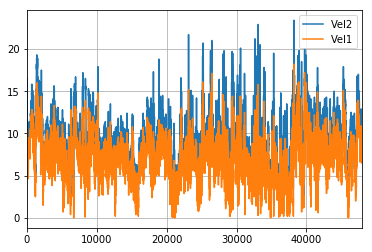

In [4]:
dataWind[{'Vel1','Vel2'}].plot(grid=True)

El valor de la velocidad media de $z = 10\;m$ . Para su cálculo de sigue, $$\left< v \right> = \frac{1}{N} \sum\limits_{i=0}^{N} x_i \tag{1}$$

In [5]:
print('<v> = %.2f m/s' % (dataWind['Vel1'].mean()))

<v> = 7.01 m/s


No menos importante es la desviación de la velocidad respecto al valor medio. Esto da una idea del grado de agitación que tiene el viento . Esta medida la relacionamos con la desviación estándar de la muestra. $$\sigma = \sqrt{\frac{1}{N} \sum\limits_{i=0}^{N} \left(x_i - \left<v\right>\right)^2 } \tag{2}$$

In [6]:
print('$\sigma$ = %.2f m/s' % (dataWind['Vel1'].std()))

$\sigma$ = 2.54 m/s


La relación entre $\sigma$ y $\left<v\right>$ define el **Índice de turbulencia** 
$$I = \frac{\sigma}{\left< v \right>}\% \tag{3}$$

Su valor se expresa en tanto porcentual

In [7]:
print('I = %.2f' % (dataWind['Vel1'].std()/dataWind['Vel1'].mean()*100.))

I = 36.27


La longitud de la serie analizada es:

In [8]:
N = len(dataWind)
print(N)

47919


Las medidas tienen un intervalo de registro de 10 min, tal como muestra los primeros valores del campo de hora y tiempo.  

In [9]:
dataWind['DateHour'][:10]

0     1.1.2010 0:0
1    1.1.2010 0:10
2    1.1.2010 0:20
3    1.1.2010 0:30
4    1.1.2010 0:40
5    1.1.2010 0:50
6     1.1.2010 1:0
7    1.1.2010 1:10
8    1.1.2010 1:20
9    1.1.2010 1:30
Name: DateHour, dtype: object

Cada uno de los valores de las variables registradas es producto de un promedio de 600 valores, corepondiente a una frecuencia de muestros de 1 Hz, correspondiente a una medida por segundo. 

Analizando el promedio de  la diferencia del campo 't' para la constante $60 x 24$ = $1440\; ^{min} / _{dia}$

In [10]:
dataWind['t'][:10].diff().mean()*60*24

10.0

Los valores máximos y mínimos de la serie analizada son:

In [11]:
print('v max, m/s: %.2f' % (dataWind['Vel1'].max()))
print('v min, m/s: %.2f' % (dataWind['Vel1'].min()))


v max, m/s: 18.20
v min, m/s: 0.00


Para conseguir un histograma equilibrado entre los valores máximos y mínimos de las lescturas necesitamos conocer el número de clases más adecuado. 

In [12]:
Nclass = int(1 + 3.3 * math.log10(N)) + 1
Nclass

17

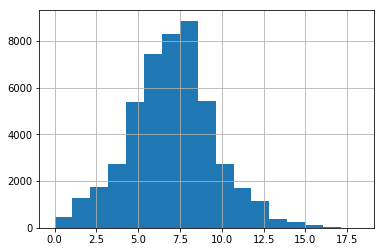

In [13]:
dataWind['Vel1'].hist(bins=Nclass);

Para la identificación de los parámetros de Weibull a partir de las medidas, es conveniente trabajar las mismas como formatos de vectores. 

In [14]:
u1 = np.array(dataWind['Vel1'])
#u2 = np.array(dataWind['Vel2'])

Se obtiene los valores de histograma y las posiciones (velocidad) centradas en cada una de las clases.

In [15]:
u1hist,u1nclass = np.histogram(u1,bins=Nclass,range=(u1.min()+0.1,u1.max()))

In [16]:
u1hist,u1nclass

(array([ 556, 1317, 1599, 3176, 5589, 6812, 9118, 8733, 4723, 2729, 1821,
        1003,  361,  264,   97,   13,    3], dtype=int64),
 array([ 0.1       ,  1.16470588,  2.22941176,  3.29411765,  4.35882353,
         5.42352941,  6.48823529,  7.55294118,  8.61764706,  9.68235294,
        10.74705882, 11.81176471, 12.87647059, 13.94117647, 15.00588235,
        16.07058824, 17.13529412, 18.2       ]))

De nuevo vemos que el histograma presenta la distribución presentada en la figura anterior, obetenida dirctamente a través de los métodos de la clase <span STYLE="font-family: courier">pandas</span>.

<BarContainer object of 17 artists>

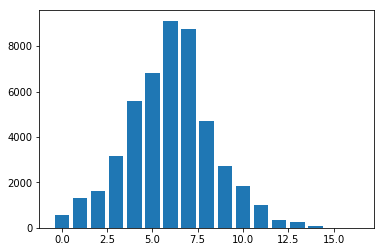

In [17]:
plt.bar(np.arange(Nclass),u1hist)

<H2>Identificación de los parámetros de Weibull</H2>

Varios métodos han sido propuestos para su identificación. Algunos de ellos tienen caracter púramente empíricos como el descrito por Lysen (1983) y otros semi-empíricos como Justus (1978).

En la práctica se sigue el metodo de doble logaritmo, método de $\textit{log-log}$, Rohatgi and Nelson (1994).

Para conseguir obtener la función complemetaria de la probabilidad $$F'(v > V) = 1 - F(v \leq V) \tag{4}$$ es necesaria la normalización del histograma.

Es por ello que se ha de tener una versión discreta numérica de la función acumulada de la distribución, definida según: $$F(v) = \int\limits_{0}^{v} p(v') dv' \tag{4}$$ siendo $v'$ una variable de integración.   

In [18]:
u1histNorm = u1hist/sum(u1hist)

In [19]:
sum(u1hist),sum(u1histNorm)

(47914, 1.0000000000000002)

In [20]:
Fu1 = np.zeros(len(u1histNorm))
for i in range(len(u1histNorm)-1):
    Fu1[i+1] = Fu1[i] + u1histNorm[i]
Fpu1 = 1 - Fu1

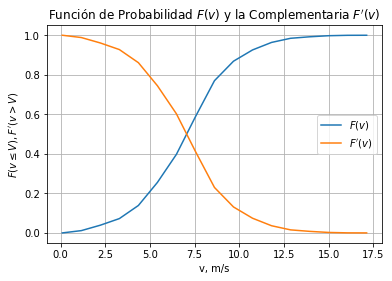

In [21]:
plt.plot(u1nclass[:-1],Fu1)
plt.plot(u1nclass[:-1],Fpu1)
plt.legend(['$F(v)$','$F\'(v)$'])
plt.xlabel('v, m/s')
plt.ylabel('$F(v\leq V),F\'(v>V)$')
plt.title('Función de Probabilidad $F(v)$ y la Complementaria $F\'(v)$')
plt.grid()
plt.show()

El cálculo de parámetros resulta de la obtención de los coeficientes de regresión de la serie formada por:

In [22]:
x = np.log(u1nclass[1:-1])
y = np.log(-np.log(Fpu1[1:]))

In [23]:
p = np.polyfit(x,y,1)

Coeficientes de la recta de regresión:

In [24]:
p

array([ 2.63718637, -5.38322203])

In [25]:
yreg = np.polyval(p,x)

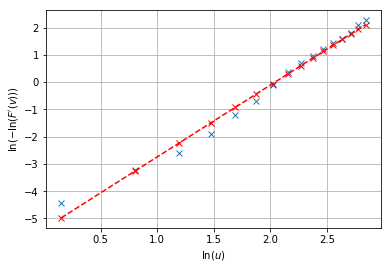

In [26]:
plt.plot(x,y,'x')
plt.plot(x,yreg,'r--x')
plt.grid()
plt.xlabel('$\ln (u)$')
plt.ylabel('$\ln ( -\ln ( F\'(v)))$')
plt.show()

<H3>Parámetros de Weibull</H3>

Obtenibles a partir de, $$k = A \tag{5.a}$$ $$c = \exp \left(-\frac{B}{A}\right) \tag{5.b}$$

In [27]:
k = p[0]
c = math.exp(-p[1]/p[0])
print('c = %.2f m/s\nk = %.2f' % (c,k))

c = 7.70 m/s
k = 2.64


El valor de $k \approx 3$ induce a pensar que la zona está fuertemente influenciada por vientos de mar. Efectivamente , este registro se realizó con la torre de Hovsore, Denmark (56.439825, 8.151433) [maps.google.com](https://www.google.com/maps/place/Hovsore/@56.4405869,8.1500625,367m/data=!3m1!1e3!4m5!3m4!1s0x464a17c808c41d55:0xd2ec8da09d529ab3!8m2!3d56.4397222!4d8.1516667). La torre se encuentra situada a unos 2 km tierra adentro de la zona de costa con el Mar del Norte recibiendo vientos del Oeste.  

En realidad el valor de $c$ corresponde al valor de velocidad $u$ por el cual la recta horizontal que pasa por $0$ de la escala de las ordenadas corta a la recta de la regresión y $k$ es la pendiente de la misma. 

<h2>Comparativas entre datos y modelo</h2>

In [28]:
Fmod = lambda v : 1 - math.exp(-(v/c)**k)

In [29]:
Fmodu1 = [Fmod(v) for v in u1nclass[1:]]

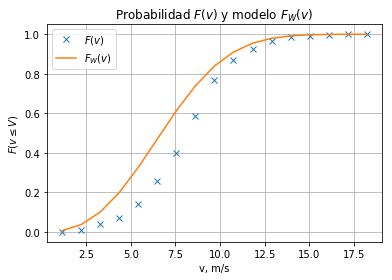

In [30]:
plt.plot(u1nclass[1:],Fu1,'x')
plt.plot(u1nclass[1:],Fmodu1)
plt.legend(['$F(v)$','$F_{W}(v)$'])
plt.xlabel('v, m/s')
plt.ylabel('$F(v\leq V)$')
plt.title('Probabilidad $F(v)$ y modelo $F_{W}(v)$')
plt.grid()
plt.show()

<h3>Curva de Duración de la Velocidad del Viento</h3>

Definición de la función de probabilidad complementaria a partir de los parámetros $c$ y $k$. $$F'(v) = \exp\left[-\left(\frac{v}{c}\right)^k\right] \tag{6}$$

In [31]:
Fpmod = lambda v : math.exp(-(v/c)**k)

In [32]:
Fpmodu1 = [ Fpmod(v) for v in u1nclass]

La duración de horas queda definida por la probabilidad complementaria de la existencia de una velocidad determinada o superior.

In [33]:
Duration = [x*24*365 for x in Fpmodu1]

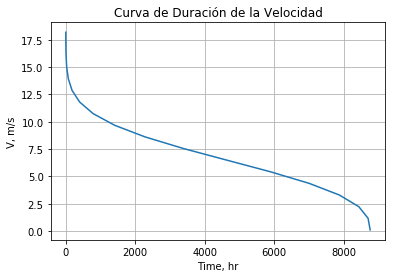

In [34]:
plt.plot(Duration,u1nclass)
plt.grid()
plt.title('Curva de Duración de la Velocidad')
plt.xlabel('Time, hr')
plt.ylabel('V, m/s')
plt.show()

Curva importante para la evaluación del rendimiento de la generación anual de una máquina en particular.

<H3>Ejemplos de Curvas de Duración de la Velocidad según Parámetro k</H3>

Es necesario una redefinición de  la función de probablilidad complementaria para parametrizarla en $k$

In [35]:
Fpmod = lambda v,k : math.exp(-(v/c)**k)

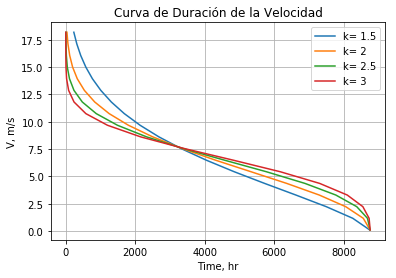

In [36]:
for k in (1.5,2,2.5,3):
    Fpmodu1 = [ Fpmod(v,k) for v in u1nclass]
    Duration = [x*24*365 for x in Fpmodu1]
    plt.plot(Duration,u1nclass,label='k= '+str(k))
    #plt.legend(str(k))

plt.legend()
plt.title('Curva de Duración de la Velocidad')
plt.xlabel('Time, hr')
plt.ylabel('V, m/s')
plt.grid()
plt.show()
    

Cuanto más horizontalizada esté la curva de velocidad, mejores aprovechamientos se conseguiran para la producción de energía durante el año.

<H2>Estimación Analítico/Empírica de los coeficientes de Weibull</H2>

El método semiempírico de Justus (1978) se basa en una aproximación de la función $\Gamma(\cdot)$ y la definición de la varianza según la distribución de Weibull. 

$$\frac{\sigma}{\left< v \right>} = \sqrt{\frac{\Gamma\left(1 + {^2 / _k} \right)}{\Gamma^2\left(1 + {^1 / _k} \right)} - 1} \tag{7}$$

Si $k$ se obtiene con la expresión semi-empírica de Justus,

$$k = \left( \frac{\sigma}{\left< v \right>} \right)^{-1.086} \tag{8}$$ y el factor de escala con la expresión conocida de la velocidad media $$c = \frac{\left< v \right>}{\Gamma\left( 1 + {^1 / _k} \right)}$$

Aplicando (7) y (8) compararemos el error cometido según el método de la práctica.

In [37]:
u1_sigma = dataWind['Vel1'].std()
u1_mean = dataWind['Vel1'].mean()
kJustus = math.pow(u1_sigma/u1_mean,-1.086)
cJustus = u1_mean/math.gamma(1 + 1/kJustus)
print('k = %.2f\nc = %.2f m/s' % (kJustus,cJustus))

k = 3.01
c = 7.85 m/s


Error aproximado a un 10% para el caso de $k$ y del 2% para $c$ si los comparamos con el método de $\textit{log-log}$. 

<h2>Factor de Potencia</h2>

Asumiendo conocidos los valoes de $c$ y $k$ , las espectativas de conocer el valor más probable de la potencia eólica tiene correspondencia directa con la misma espectatica de $\left< v^3 \right>$. 

$$\left< u^3 \right> = \int\limits_{0}^{\infty} u^3 p(u) du = c^3 \Gamma\left( 1 + {^3 / _k} \right)$$

Este valor se puede normalizar respecto al $\left< u \right>^3$ quedando la expresión del _Factor de Energía_ $F_e$, $$F_e = \frac{\left< u^3 \right>}{\left< u \right>^3} = \frac{\Gamma\left( 1 + {^3 / _k} \right)}{\Gamma^3\left( 1 + {^1 / _k} \right)} \tag{8}$$

Para el caso analizado, este valor es:

In [38]:
k = 2.64
Fe = math.gamma(1+3/k)/math.gamma(1+1/k)
print('Fe = %.2f' % Fe)

Fe = 1.20


<h3>Variación del $F_e$ según $k$</h3>

In [39]:
for k in (1.5,2,2.5,3):
    Fe = math.gamma(1+3/k)/math.gamma(1+1/k)
    print('Fe(%.1f) = %.2f' % (k,Fe))

Fe(1.5) = 2.22
Fe(2.0) = 1.50
Fe(2.5) = 1.24
Fe(3.0) = 1.12


$F_e$ representa la dispersión de la energía/potencia real versus la referencia de la potencia de la velocidad media. Cuanto más alto es $k$ esta dispersión disminuye, tal como lo muestra la tabla arriba presentada. 

In [40]:
for k in (1.5,2,2.5,3):
    Fe = math.gamma(1+3/k)/math.gamma(1+1/k)
    print('Fe(%.1f) = %.2f' % (k,Fe))

Fe(1.5) = 2.22
Fe(2.0) = 1.50
Fe(2.5) = 1.24
Fe(3.0) = 1.12


In [41]:
k = list(map(lambda x : 1 + 0.25*x, range(12)))
k

[1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75]

In [42]:
Fe = list(map(lambda k : math.gamma(1+3/k)/math.gamma(1+1/k),k))

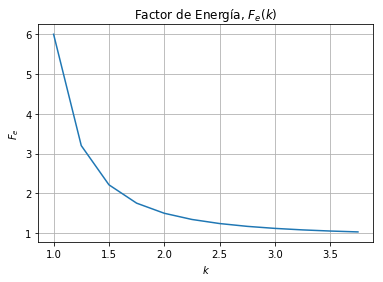

In [43]:
plt.plot(k,Fe)
plt.grid()
plt.title('Factor de Energía, $F_e(k)$')
plt.xlabel('$k$')
plt.ylabel('$F_e$')
plt.show()

A mejores vientos observamos que la dispersión disminuye, una de las justificaciones de la conveniencia de la eólica marina.  

<H2>Análisis de la Dirección del Viento</H2>

In [44]:
d1 = np.array(dataWind['Dir1'])
d2 = np.array(dataWind['Dir2'])
t = np.array(dataWind['t'])

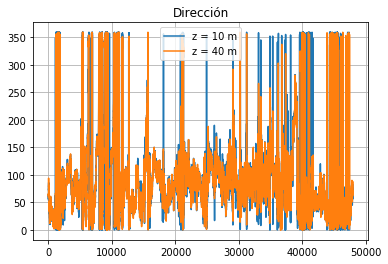

In [45]:
plt.plot(d1,label='z = 10 m')
plt.plot(d2, label='z = 40 m')
plt.title('Dirección')
plt.legend()
plt.grid()

<H3>Rosa de los Vientos: Velocidad</H3>

In [46]:
import windrose
import matplotlib.cm as cm

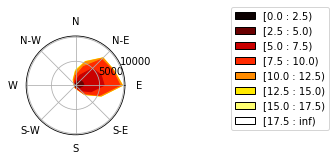

In [51]:
fig = plt.figure()
ax = fig.add_subplot(221, projection="windrose")
ax.contourf(d1, u1, bins=np.arange(0, np.max(u1), 2.5), cmap=cm.hot)
ax.legend(bbox_to_anchor=(2.02, 0))
plt.show()
plt.show()

<H3>Rosa de los Vientos: Potencia Específica</H3>

Se considera una densidad, $\rho = 1.225\, {^{kg}/_{m^3}}$

In [73]:
pow_espec = list(map(lambda x : 0.6125*x**3, u1))

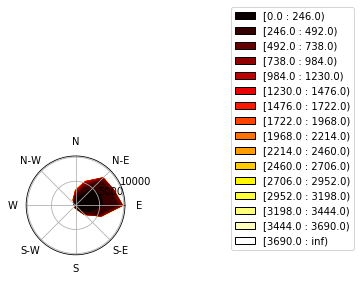

In [74]:
fig = plt.figure()
ax = fig.add_subplot(221, projection="windrose")
pow_especMax = np.max(pow_espec)
pow_espec_Intervals = int(pow_especMax/15.)
ax.contourf(d1, pow_espec, bins=np.arange(0, pow_especMax, pow_espec_Intervals), cmap=cm.hot)
ax.legend(bbox_to_anchor=(2.02, 0))
plt.show()
plt.show()

<h2>Referencias</h2>

- [Justus, 1978]: Justus, C. G. Winds and Wind System Performance. (1978).
- [Jamil, 1994]: Jamil, M. Wind power statistics and evaluation of wind energy density. Wind Eng. 18, 227–240 (1994).
- [Rohatgi and Nelson, 1994]: Rohatgi, J. S. and Nelson, V.  Wind Characteristics: An Analysis for the Generation of Wind Power. Alternative Energy Institute, Canyon, TX. (1994).